In [1]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train1.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test_data = pd.read_csv("test1.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
592,593,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,138000
1152,1153,20,RL,90.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,230000
1263,1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,180500
1192,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
1143,1144,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,80000


In [5]:
print(train_data.sample(5).to_string()) # Used for printing all columns not .... as head command

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
369    370          20       RL          NaN     9830   Pave   NaN      IR1         Lvl    AllPub  

In [6]:
train_data.shape

(1460, 81)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

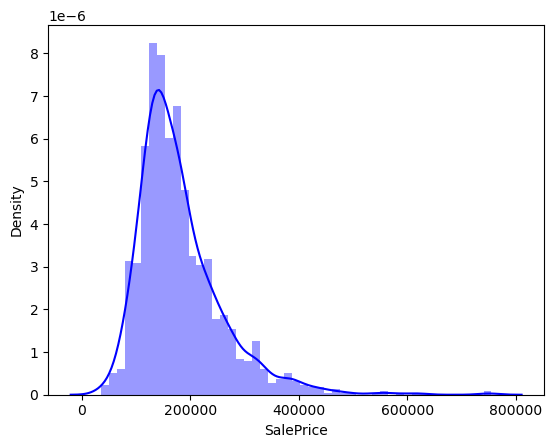

In [8]:
sns.distplot(train_data['SalePrice'], color = 'b')


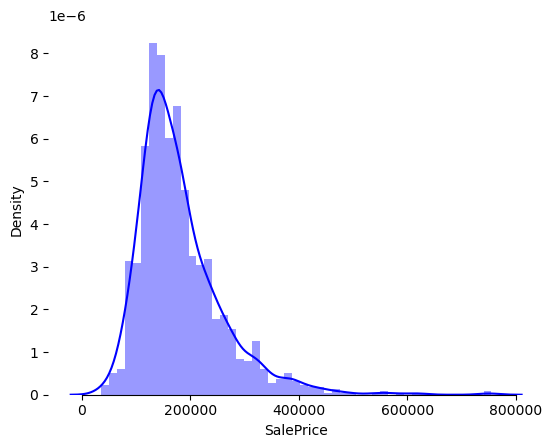

In [9]:
sns.distplot(train_data['SalePrice'], color = 'b')

sns.despine(trim = True, left = True)

In [10]:
train_data['SalePrice'].skew()

1.8828757597682129

In [11]:
train_data['SalePrice'].kurt()

6.536281860064529

In [12]:
train_data.select_dtypes('int64')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [13]:
train_data.select_dtypes('float64')

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [14]:
train_data.GarageYrBlt.isna().sum()

81

In [15]:
df = pd.DataFrame()
df['col1'] = [1980, 1981, 1943, np.nan]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    3 non-null      float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [16]:
type(np.nan) #nan = not a number

float

In [17]:
# There are 81 nan values in the column so it is float in nature

In [18]:
train_data.loc[train_data.GarageYrBlt.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [19]:
train_data.loc[train_data.GarageYrBlt.isna(), ['Id', 'GarageYrBlt']]

,Id,GarageYrBlt
39,40,NaN
48,49,NaN
78,79,NaN
88,89,NaN
89,90,NaN
...,...,...
1349,1350,NaN
1407,1408,NaN
1449,1450,NaN
1450,1451,NaN


In [20]:
train_data.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:>

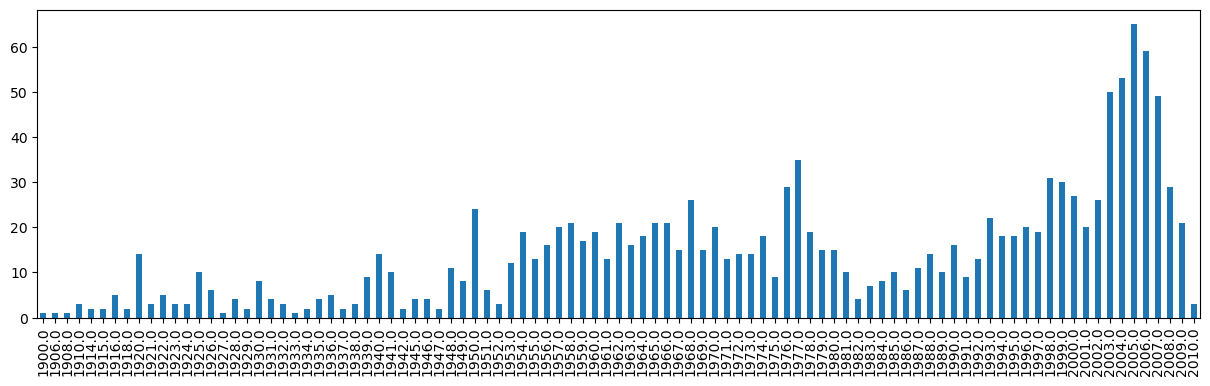

In [21]:
plt.figure(figsize = (15, 4))
train_data.GarageYrBlt.value_counts().sort_index().plot.bar()

In [22]:
train_data.groupby("GarageYrBlt").agg({"SalePrice" :  "mean"})

,SalePrice
GarageYrBlt,
1900.0,133900.000000
1906.0,135000.000000
1908.0,240000.000000
1910.0,125000.000000
1914.0,150943.500000
...,...
2006.0,262001.338983
2007.0,240372.836735
2008.0,306569.034483


<AxesSubplot:xlabel='GarageYrBlt'>

<Figure size 1500x400 with 0 Axes>

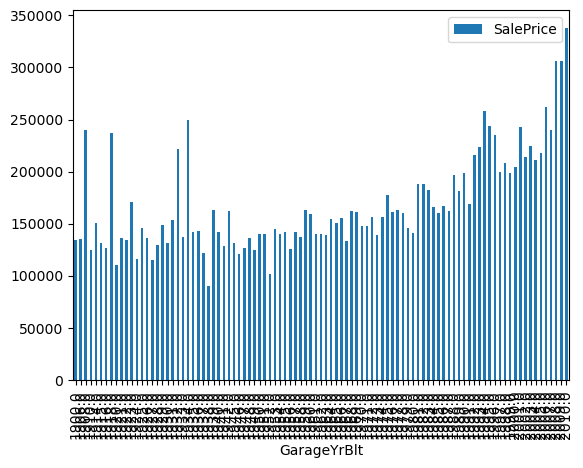

In [23]:
plt.figure(figsize = (15, 4))
train_data.groupby("GarageYrBlt").agg({"SalePrice" :  "mean"}).plot.bar()

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

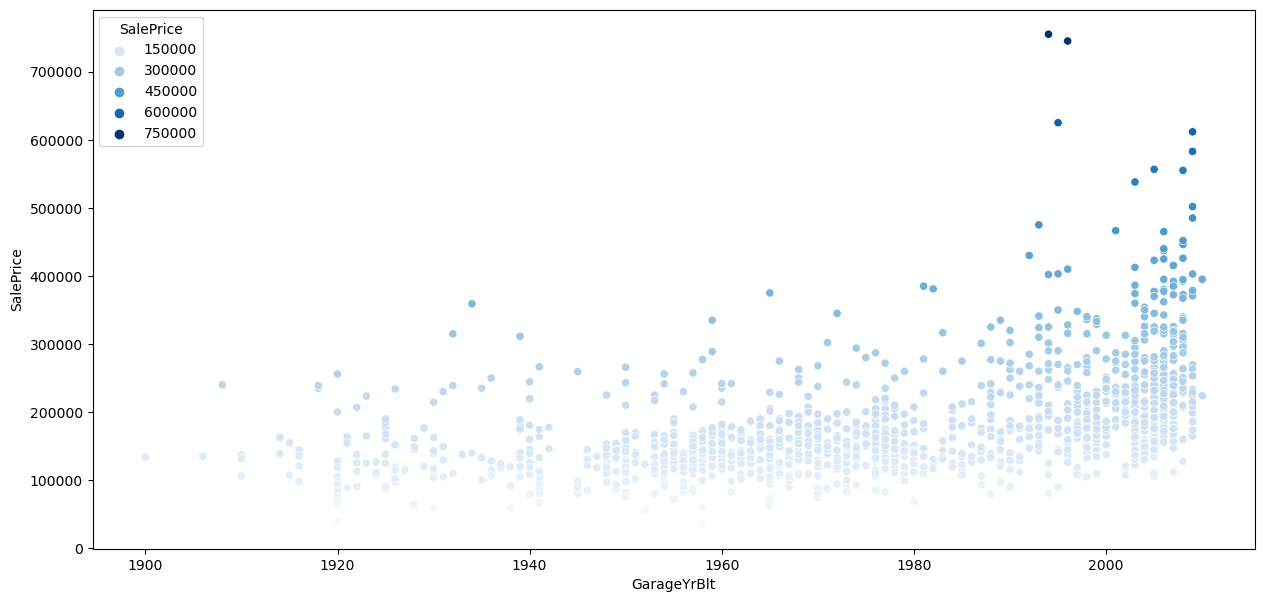

In [24]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = "GarageYrBlt", y = "SalePrice", data = train_data, hue = "SalePrice", palette = "Blues")

In [25]:
# There are 2 ouliers which crossed 700000 dollars SalePrice

In [26]:
# numeric_dtypes = ['float64', 'int64']
# numeric = []
# for i in train_data.columns:
#     if train_data[i].dtype in numeric_dtypes:
#         numeric.append(i)
        
# fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (12, 120))
# plt.subplots_adjust(right = 2)
# plt.subplots_adjust(top = 2)
# sns.color_palette('hus1', 8)
# for i, feature in enumerate(list(train_data[numeric]), i):
#     plt.subplot(len(list(numeric)), 3, i)
#     sns.scatterplot(x = feature, y = "SalePrice", hue = "SalePrice", palette='Blues', data = train_data)
    
#     plt.xlabel("{}".format(feature), size = 15, labelpad = 12.5)
#     plt.ylabel("SalePrice",  size = 15, labelpad = 12.5)    
#     for j in range(2):
#         plt.tick_params(axis = 'x', labelsize = 12)
#         plt.tick_params(axis = 'y', labelsize = 12)        
#     plt.legend(loc = 'best', prop = {"size" : 10})
    
# plt.show()

In [27]:
product = ["P1", 'P3', 'P5', 'P10']
for index, prod in enumerate(product, 1):
    print(index, prod)

1 P1
2 P3
3 P5
4 P10


<AxesSubplot:>

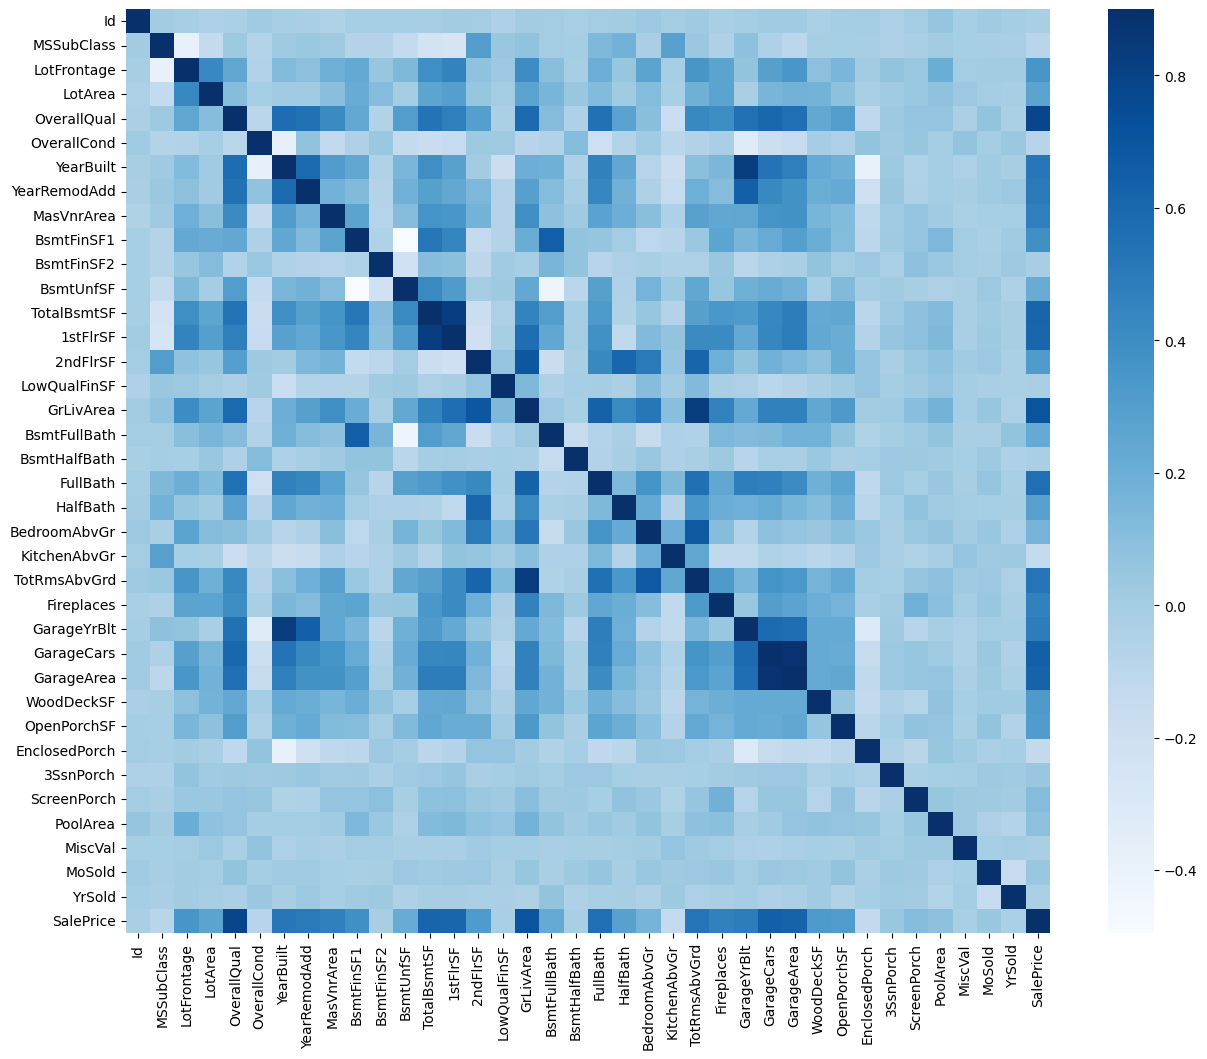

In [28]:
corr = train_data.corr()
plt.subplots(figsize = (15, 12))
sns.heatmap(corr, vmax = 0.9, cmap = 'Blues', square = True)

(-0.5, 9.5, 0.0, 800000.0)

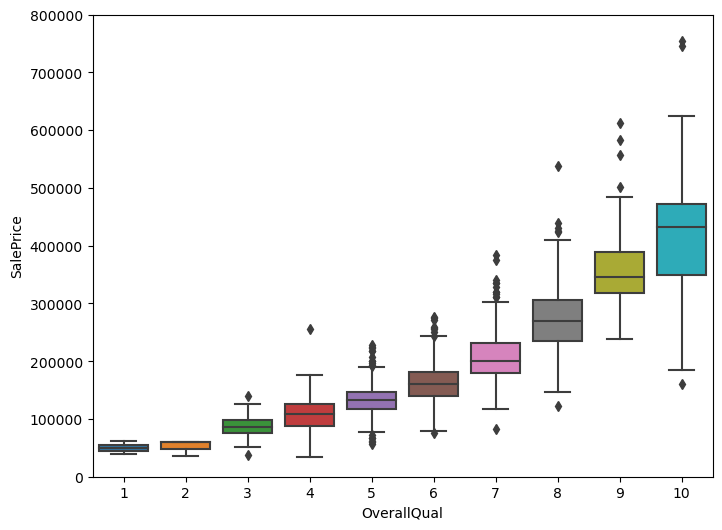

In [29]:
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = train_data["OverallQual"], y = 'SalePrice', data = train_data)
fig.axis(ymin =0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

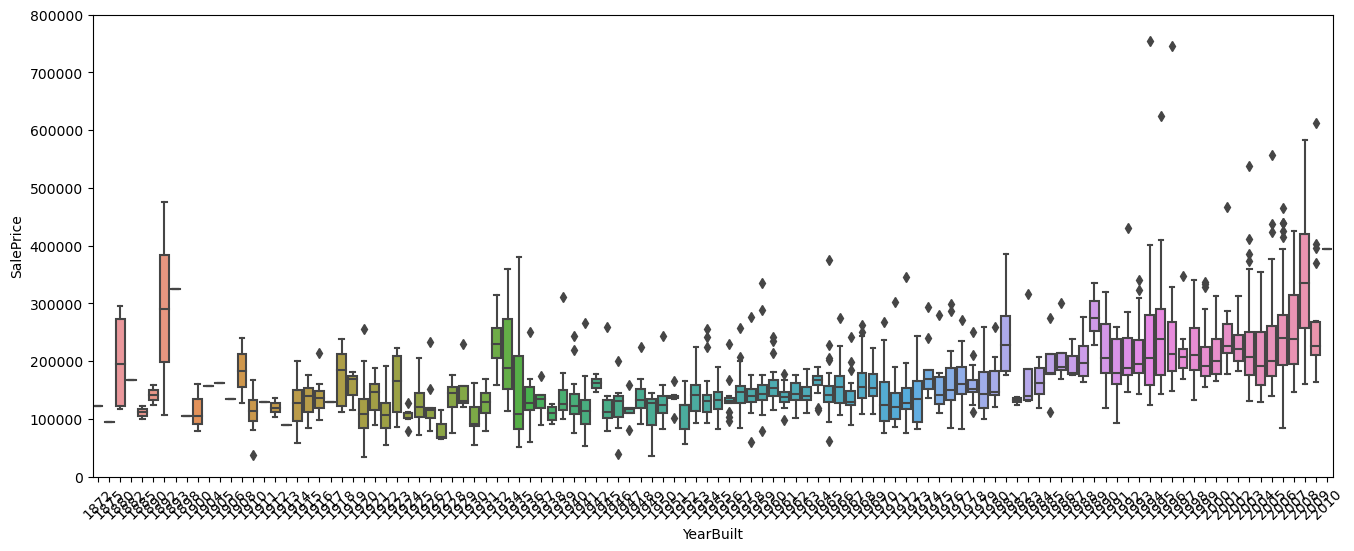

In [30]:
f, ax = plt.subplots(figsize = (16, 6))
fig = sns.boxplot(x = train_data["YearBuilt"], y = 'SalePrice', data = train_data)
fig.axis(ymin =0, ymax = 800000)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

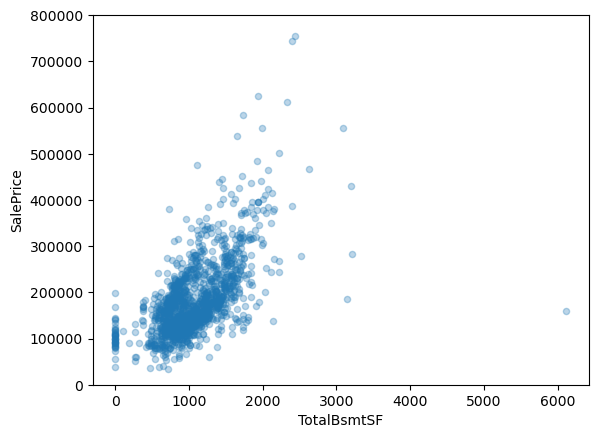

In [31]:
train_data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', alpha = 0.3, ylim = (0, 800000))

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

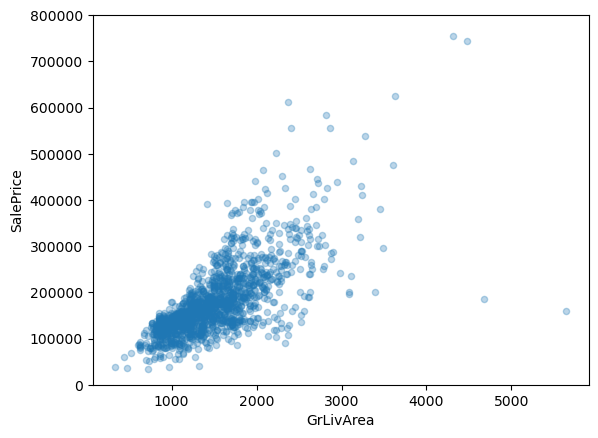

In [32]:
train_data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', alpha = 0.3, ylim = (0, 800000))

In [33]:
train_data = train_data.drop(['Id'], axis = 1)

In [34]:
train_data ['SalePriceLog'] = np.log1p(train_data.SalePrice)

In [35]:
train_data.SalePriceLog.skew()

0.12134661989685333

<AxesSubplot:xlabel='SalePriceLog', ylabel='Density'>

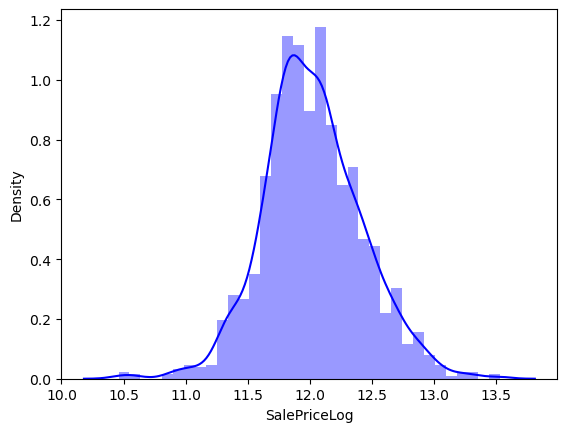

In [36]:
sns.distplot(train_data.SalePriceLog, color = 'b')

In [37]:
# You can see now it is a skewed data , not positively or negatively like below one is positevely skewed

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

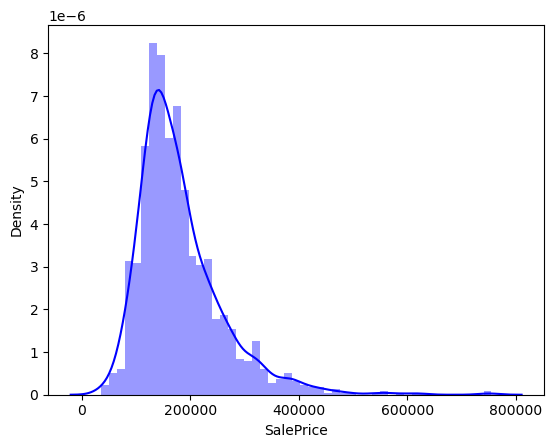

In [38]:
sns.distplot(train_data.SalePrice, color = 'b')

In [39]:
# Outlier
train_data.loc[(train_data['OverallQual'] < 5)& (train_data['SalePrice'] > 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
457,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,...,NaN,NaN,NaN,0,3,2008,WD,Normal,256000,12.452937


In [40]:
train_data.drop(train_data.loc[(train_data['OverallQual'] < 5)& (train_data['SalePrice'] > 200000)].index, inplace = True)

In [41]:
# Another outlier

train_data.loc[(train_data['GrLivArea'] > 4500)& (train_data['SalePrice'] < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,12.126764
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,11.982935


In [42]:
train_data.drop(train_data.loc[(train_data['GrLivArea'] > 4500)& (train_data['SalePrice'] < 300000)].index, inplace = True)

In [43]:
train_data.isna().sum().sort_values(ascending = False)

PoolQC          1451
MiscFeature     1403
Alley           1366
Fence           1176
FireplaceQu      690
                ... 
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
SalePriceLog       0
Length: 81, dtype: int64

In [44]:
train_data['PoolQC'] = train_data['PoolQC'].fillna('none')

In [45]:
missing_values = train_data.isna().sum().sort_values(ascending = False)
missing_values[missing_values > 0]

MiscFeature     1403
Alley           1366
Fence           1176
FireplaceQu      690
LotFrontage      258
GarageFinish      81
GarageYrBlt       81
GarageCond        81
GarageQual        81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

In [46]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_data[col] = train_data[col].fillna(0)

In [47]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')

In [48]:
train_data['Functional'] = train_data['Functional'].fillna('Typ')

In [49]:
train_data['MSSubClass']  = train_data['MSSubClass'].astype('object')

In [50]:
train_data['YrSold']  = train_data['YrSold'].astype('object')
train_data['MoSold']  = train_data['MoSold'].astype('object')

In [51]:
train_data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      258
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
SalePriceLog       0
Length: 81, dtype: int64

In [52]:
train_data.isna().sum().sort_values()

MSSubClass         0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
                ... 
LotFrontage      258
FireplaceQu      690
Fence           1176
Alley           1366
MiscFeature     1403
Length: 81, dtype: int64

In [53]:
train_data.isna().sum().sort_values(ascending = False)

MiscFeature     1403
Alley           1366
Fence           1176
FireplaceQu      690
LotFrontage      258
                ... 
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
SalePriceLog       0
Length: 81, dtype: int64

In [54]:
train_data['Electrical'] = train_data['Electrical'].fillna('Sbrkr')

In [55]:
train_data['KitchenQual'] = train_data['KitchenQual'].fillna('TA')

In [56]:
train_data['Exterior1st'] = train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])

In [57]:
train_data['Exterior2nd'] = train_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])

In [58]:
train_data['SaleType'] = train_data['SaleType'].fillna(train_data['Exterior2nd'].mode()[0])

In [59]:
train_data['PoolQC'] = train_data['PoolQC'].fillna('None')

In [60]:
train_data['LotFrontage'].isna().sum()

258

In [61]:
train_data.groupby("Neighborhood").agg(mean_if = ("LotFrontage", "mean"), median_if = ("LotFrontage", "median"))

,mean_if,median_if
Neighborhood,,
Blmngtn,47.142857,43.0
Blueste,24.000000,24.0
BrDale,21.562500,21.0
BrkSide,57.509804,52.0
ClearCr,83.461538,80.0
CollgCr,71.682540,70.0
Crawfor,71.804878,74.0
Edwards,64.811111,64.5
Gilbert,79.877551,65.0


In [62]:
train_data.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1457, dtype: float64

In [63]:
train_data['LotFrontage'] = train_data.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [64]:
train_data.loc[train_data['Neighborhood'] == 'NWAmes', ['Neighborhood', 'LotFrontage']]

,Neighborhood,LotFrontage
7,NWAmes,80.0
100,NWAmes,80.0
109,NWAmes,105.0
124,NWAmes,48.0
135,NWAmes,80.0
...,...,...
1409,NWAmes,46.0
1420,NWAmes,90.0
1429,NWAmes,80.0
1439,NWAmes,80.0


In [65]:
train_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
SalePriceLog     0
Length: 81, dtype: int64

In [66]:
for col in train_data.select_dtypes('object'):
    train_data[col] = train_data[col].fillna('None')


In [67]:
train_data.isna().sum().sort_values(ascending = False)

MasVnrArea      8
MSSubClass      0
GarageCars      0
GarageYrBlt     0
GarageType      0
               ..
ExterQual       0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePriceLog    0
Length: 81, dtype: int64

In [68]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

In [69]:
train_data.isna().sum().sort_values(ascending = False)

MSSubClass      0
Electrical      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
               ..
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
SalePriceLog    0
Length: 81, dtype: int64

In [70]:
# Dependent variable

train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

In [71]:
#train = train_data.drop(columns = ['Id'])

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1457 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          1457 non-null   object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   int64  
 17  OverallCond    1457 non-null   int64  
 18  YearBuil

In [73]:
train_data.select_dtypes('int64')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [74]:
num_cols = train_data.select_dtypes(['int64', 'float64']).columns

<AxesSubplot:>

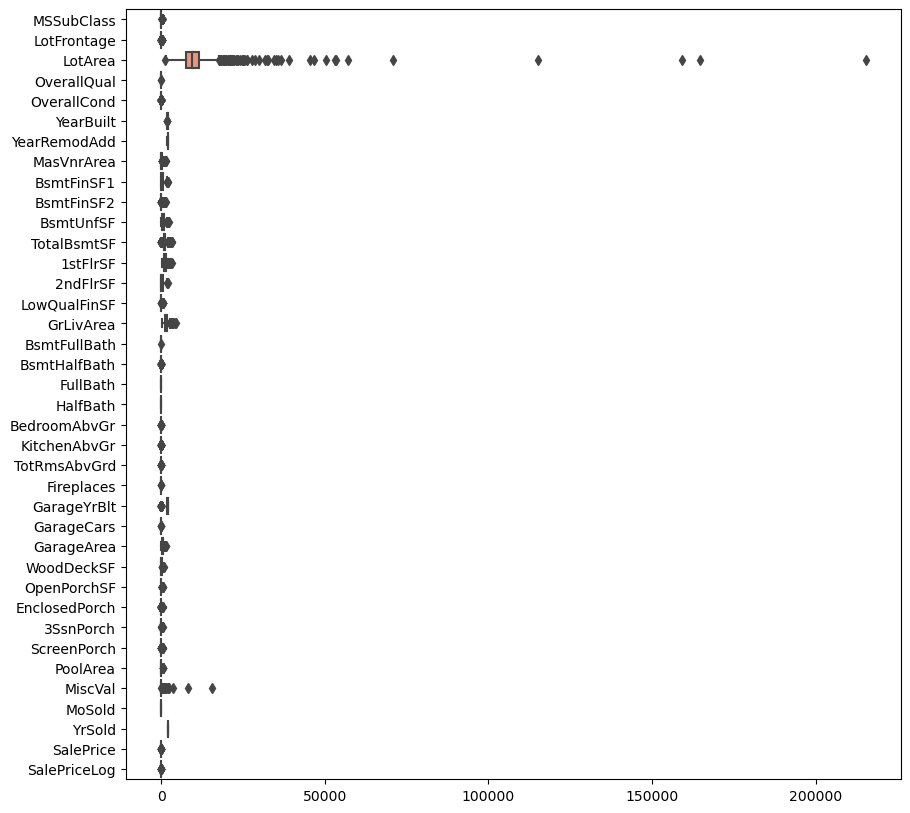

In [75]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = train_data[num_cols], orient = 'h')

In [76]:
from scipy.stats import skew

In [77]:
new = train_data.loc[train_data["LotArea"] >= 100000].to_string()

In [78]:
skew = train_data[num_cols].apply(lambda x: skew(x)).sort_values(ascending = False)

In [79]:
high_skew = skew[skew  > 0.5]

In [80]:
high_skew

MiscVal          24.426546
PoolArea         15.927003
LotArea          12.755946
3SsnPorch        10.282886
LowQualFinSF      8.992490
KitchenAbvGr      4.478508
BsmtFinSF2        4.245879
ScreenPorch       4.113045
BsmtHalfBath      4.094248
EnclosedPorch     3.082631
MasVnrArea        2.692486
OpenPorchSF       2.342293
LotFrontage       1.547331
WoodDeckSF        1.546764
MSSubClass        1.404841
GrLivArea         1.010299
BsmtUnfSF         0.918905
1stFlrSF          0.889179
2ndFlrSF          0.811079
BsmtFinSF1        0.766260
OverallCond       0.690936
HalfBath          0.678259
TotRmsAbvGrd      0.659034
Fireplaces        0.631727
BsmtFullBath      0.591647
TotalBsmtSF       0.512553
dtype: float64

In [81]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [82]:
# It is a transformtion but it says if the value is zero it takes the log of that value Read again in details

In [83]:
# we use log when our values in the dataset are increasing exponentially 

In [84]:
for i in high_skew.index:
    train_data[i] = boxcox1p(train_data[i], boxcox_normmax(train_data[i] + 1))

<AxesSubplot:>

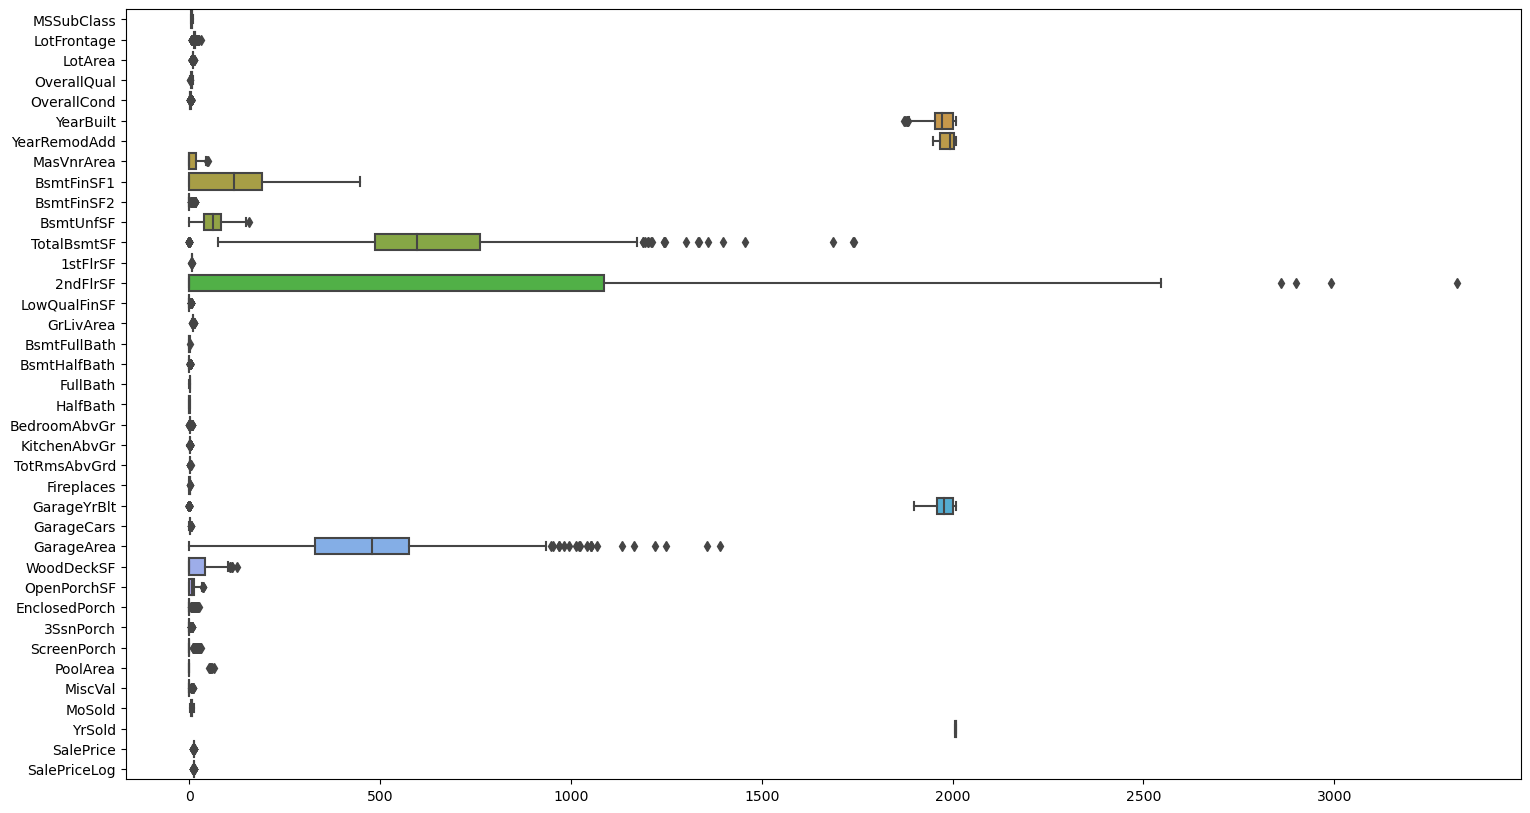

In [85]:
plt.figure(figsize = (18, 10))
sns.boxplot(data = train_data[num_cols], orient = 'h')

In [86]:
# Garage Area is showing something different, can detect it using heatmap correlation 

In [87]:
train_data['BsmtFinType1'].value_counts()

Unf     430
GLQ     416
ALQ     220
BLQ     147
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [88]:
train_data.groupby("BsmtFinType1")["SalePrice"].mean()

BsmtFinType1
ALQ     11.953320
BLQ     11.863660
GLQ     12.303130
LwQ     11.881361
None    11.529691
Rec     11.852854
Unf     11.964004
Name: SalePrice, dtype: float64

In [89]:
# Feature Generation 

# Create a new feature  while giving more power precedence to a category of data 

In [90]:
train_data['BsmtFinType1_unf'] = 1 * (train_data['BsmtFinType1'] == 'Unf')

In [91]:
train_data['WoodDeckSF'].value_counts()

0.000000      761
45.999733      38
29.616310      36
37.907492      33
33.514464      31
             ... 
65.523503       1
43.884978       1
30.217068       1
43.389513       1
112.431932      1
Name: WoodDeckSF, Length: 274, dtype: int64

In [92]:
train_data.loc[train_data['WoodDeckSF'] == 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog,BsmtFinType1_unf
0,6.278644,RL,13.809205,9.091255,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.000000,2,2008,WD,Normal,12.247699,12.247699,0
2,6.278644,RL,14.157416,9.380598,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0.000000,9,2008,WD,Normal,12.317171,12.317171,0
3,6.619682,RL,13.210358,9.214960,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0.000000,2,2006,WD,Abnorml,11.849405,11.849405,0
9,9.105854,RL,11.932111,8.959877,Pave,None,Reg,Lvl,AllPub,Corner,...,None,None,0.000000,1,2008,WD,Normal,11.678448,11.678448,0
10,4.145435,RL,14.385272,9.376094,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.000000,2,2008,WD,Normal,11.771444,11.771444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,4.145435,RL,15.265404,9.184004,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.000000,5,2009,New,Partial,12.567555,12.567555,1
1452,8.958185,RM,9.744205,8.250137,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.000000,5,2006,WD,Normal,11.884496,11.884496,0
1454,4.145435,FV,13.452802,8.970715,Pave,Pave,Reg,Lvl,AllPub,Inside,...,None,None,0.000000,10,2009,WD,Normal,12.128117,12.128117,0
1455,6.278644,RL,13.452802,9.025401,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.000000,8,2007,WD,Normal,12.072547,12.072547,1


In [93]:
 train_data['HasWoodDeck'] = 1 * (train_data['WoodDeckSF'] >= 0)

In [94]:
train_data['YearsSinceRemodel'] = train_data['YrSold'] - train_data['YearRemodAdd']

In [95]:
train_data['Total_Home_Quality'] = train_data['OverallQual'] + train_data['OverallCond']

In [96]:
train_data.drop(columns = ['Utilities', 'Street', 'PoolQC'], inplace=True)

In [97]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [98]:
# del train_data['SalePrice']

In [99]:
train_data2 = pd.get_dummies(train_data).reset_index(drop = True)

In [100]:
train_data2.shape

(1457, 301)

In [132]:
X = train_data2.drop(columns = ['SalePrice'])

In [131]:
Y = train_data2["SalePrice"]

In [102]:
train_data2 = train_data2.loc[:, ~train_data2.columns.duplicated()]

In [103]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline

In [104]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [105]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred)) # sklearn only gives us mean square error but for doing root we are doing this

In [133]:
def cv_rmse(model, X=x):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring = 'neg_mean_squared_error', cv = kf))
    return (rmse)

In [118]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [119]:
from mlxtend.regressor import StackingCVRegressor

In [109]:
lgbm = LGBMRegressor(objective = 'regression', num_leaves = 6, learning_rate = 0.01)

In [110]:
svr = make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003))

In [123]:
stack_model = StackingCVRegressor(regressors = [lgbm, svr], meta_regressor = lgbm)

In [134]:
score = cv_rmse(lgbm)

In [135]:
score

array([0.16091457, 0.1525277 , 0.14876933, 0.15040274, 0.14722348,
       0.17418544, 0.19804623, 0.17079641, 0.15980431, 0.16078638])

In [138]:
score.mean()

0.16234566019587066

In [139]:
score.std()

0.01465976332868286

In [141]:
score = cv_rmse(svr)

In [142]:
score.mean()

0.026983470358575255

In [143]:
score.std()

0.016114777694434576

In [144]:
stack_gen_model = stack_model.fit(np.array(X), np.array(train_data2["SalePrice"]))

In [149]:
y_pred = stack_gen_model.predict(X)

In [150]:
rmse(Y, y_pred)

0.16259150062435754